In [8]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('/content/placement.csv')

In [11]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [13]:
df.shape

(100, 4)

In [15]:
df = df.iloc[:,1:]

In [16]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [17]:
import matplotlib.pyplot as plt

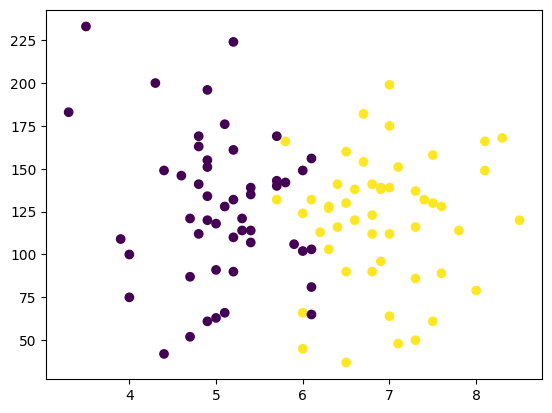

In [18]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [22]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [23]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [25]:
X_train

,cgpa,iq
21,7.1,151.0
42,7.6,89.0
0,6.8,123.0
23,4.7,87.0
13,6.4,116.0
...,...,...
51,4.8,141.0
69,8.5,120.0
36,5.7,140.0
17,3.3,183.0


In [26]:
y_train

,placement
21,1
42,1
0,1
23,0
13,1
...,...
51,0
69,1
36,0
17,0


In [27]:
X_test

,cgpa,iq
64,7.0,64.0
95,4.3,200.0
60,6.9,139.0
73,4.9,61.0
58,8.0,79.0
70,6.3,127.0
25,5.0,91.0
31,3.9,109.0
59,4.8,112.0
75,4.8,169.0


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_train

array([[ 0.95810731,  0.67407348],
       [ 1.40815772, -0.9043277 ],
       [ 0.68807707, -0.03875286],
       [-1.20213465, -0.95524387],
       [ 0.32803674, -0.21695945],
       [-0.03200358, -0.01329478],
       [-0.12201367, -0.47154028],
       [ 0.68807707,  0.41949264],
       [ 1.13812748, -0.21695945],
       [ 0.0580065 ,  0.19036989],
       [ 0.14801658, -0.2933337 ],
       [ 0.23802666, -0.54791453],
       [-0.30203383,  1.13231898],
       [ 0.86809723, -0.31879178],
       [ 1.58817789, -0.26787561],
       [ 0.32803674,  0.41949264],
       [-0.9321044 , -0.16604328],
       [-0.84209432,  1.31052557],
       [-0.9321044 , -1.56623787],
       [-1.83220522, -0.62428878],
       [ 0.0580065 ,  0.8013639 ],
       [ 0.0580065 , -1.10799237],
       [ 1.85820813,  1.05594473],
       [ 1.13812748, -0.98070195],
       [-0.57206407,  0.36857648],
       [ 0.41804682,  0.13945372],
       [ 0.86809723,  0.36857648],
       [-0.75208424,  0.92865431],
       [-2.28225563,

In [32]:
X_test = scaler.transform(X_test)

In [33]:
X_test

array([[ 0.86809723, -1.54077979],
       [-1.56217497,  1.92151957],
       [ 0.77808715,  0.36857648],
       [-1.02211448, -1.61715404],
       [ 1.76819805, -1.15890854],
       [ 0.23802666,  0.06307947],
       [-0.9321044 , -0.85341153],
       [-1.9222153 , -0.39516603],
       [-1.11212456, -0.31879178],
       [-1.11212456,  1.13231898]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [36]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
y_test

,placement
64,1
95,0
60,1
73,0
58,1
70,1
25,0
31,0
59,0
75,0


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

1.0

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

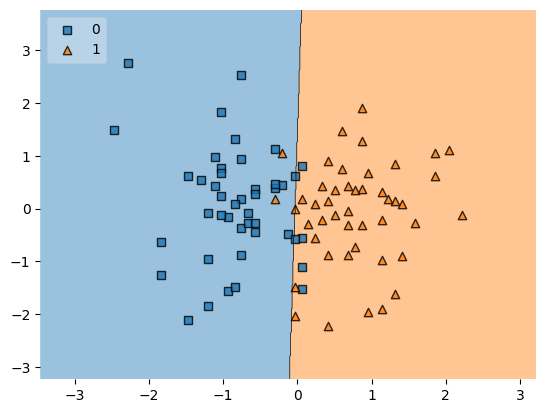

In [42]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [43]:
import pickle

In [44]:
pickle.dump(clf,open('model.pkl','wb'))